#### Vivian Xia

## Assignment 1: Data Preparation – Graphs and Statistical Output

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set>

In [ ]:
pd.set_option('display.max_rows', None) #no limit on number of rows
pd.set_option('display.max_columns', None) #no limit on number of columns
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1) #sets width of columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
df = pd.read_csv('HMEQ_Loss.csv')
print(df.head().T)

                       0        1        2     3        4
TARGET_BAD_FLAG  1        1        1        1     0      
TARGET_LOSS_AMT  641      1109     767      1425  NaN    
LOAN             1100     1300     1500     1500  1700   
MORTDUE          25860    70053    13500    NaN   97800  
VALUE            39025    68400    16700    NaN   112000 
REASON           HomeImp  HomeImp  HomeImp  NaN   HomeImp
JOB              Other    Other    Other    NaN   Office 
YOJ              10.5     7        4        NaN   3      
DEROG            0        0        0        NaN   0      
DELINQ           0        2        0        NaN   0      
CLAGE            94.3667  121.833  149.467  NaN   93.3333
NINQ             1        0        1        NaN   0      
CLNO             9        14       10       NaN   14     
DEBTINC          NaN      NaN      NaN      NaN   NaN    


Note that there are missing values in almost every column as seen from customer 3 and DEBTINC. 

In [ ]:
#create a variable for a specific column to make it easier to refer to in the future
TARGET_FLAG = 'TARGET_BAD_FLAG'
TARGET_LOSS = 'TARGET_LOSS_AMT'

In [ ]:
dt = df.dtypes
print(dt)

TARGET_BAD_FLAG    int64  
TARGET_LOSS_AMT    float64
LOAN               int64  
MORTDUE            float64
VALUE              float64
REASON             object 
JOB                object 
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object


In [ ]:
x = df.describe().T
print(x)

                  count           mean           std          min  \
TARGET_BAD_FLAG  5960.0  0.199497       0.399656      0.000000      
TARGET_LOSS_AMT  1189.0  13414.576955   10839.455965  224.000000    
LOAN             5960.0  18607.969799   11207.480417  1100.000000   
MORTDUE          5442.0  73760.817200   44457.609458  2063.000000   
VALUE            5848.0  101776.048741  57385.775334  8000.000000   
YOJ              5445.0  8.922268       7.573982      0.000000      
DEROG            5252.0  0.254570       0.846047      0.000000      
DELINQ           5380.0  0.449442       1.127266      0.000000      
CLAGE            5652.0  179.766275     85.810092     0.000000      
NINQ             5450.0  1.186055       1.728675      0.000000      
CLNO             5738.0  21.296096      10.138933     0.000000      
DEBTINC          4693.0  33.779915      8.601746      0.524499      

                          25%           50%            75%            max  
TARGET_BAD_FLAG  0.000000 

The TARGET_LOSS_AMT may have outliers considering the increase from the 75% to max value. This may be attributed to the LOAN, MORTDUE, VALUE amount as its max value compared to its 75% is also significantly greater. 

The CLAGE, CLNO, DEBTINC may have outliers too. 

In [ ]:
objList = []
intList = []
floatList = []

for i in dt.index:
  if i in ([TARGET_FLAG, TARGET_LOSS]) : continue 
  if dt[i] in (["object"]): objList.append(i)
  if dt[i] in (["float64"]): floatList.append(i)
  if dt[i] in (["int64"]): intList.append(i)

In [ ]:
print("-- OBJECTS --")
for i in objList:
  print(i)
print("\n")

print("-- INTEGER --")
for i in intList: 
  print(i)
print("\n")

print("-- FLOAT --")
for i in floatList: 
  print(i)
print("\n")

-- OBJECTS --
REASON
JOB


-- INTEGER --
LOAN


-- FLOAT --
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC




In [ ]:
for i in objList:
  print("Class = ", i)
  g = df.groupby(i)
  print(g[i].count())
  x = g[TARGET_FLAG].mean()
  print("Bad Loan Prob", x)
  print(".................")
  x=g[TARGET_LOSS].mean()
  print("Loss Amount", x)
  print("=============\n\n\n ")

Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Bad Loan Prob REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
.................
Loss Amount REASON
DebtCon    16005.163758
HomeImp    8388.090909 
Name: TARGET_LOSS_AMT, dtype: float64


 
Class =  JOB
JOB
Mgr        767 
Office     948 
Other      2388
ProfExe    1276
Sales      109 
Self       193 
Name: JOB, dtype: int64
Bad Loan Prob JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
.................
Loss Amount JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


Explore variables with visualization and graphs.

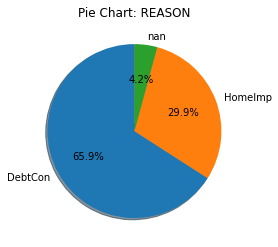

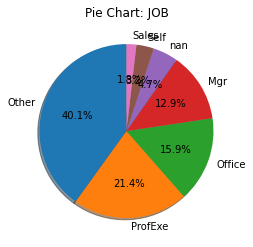

In [ ]:
for i in objList:
  x = df[i].value_counts(dropna=False) #count values but do not drop NaN
  theLabels = x.axes[0].tolist()
  theSlices = list(x) #tell the slices/no. of each label
  plt.pie(theSlices, labels=theLabels, startangle=90, shadow=True, autopct="%1.1f%%")
  plt.title("Pie Chart: " + i)
  plt.show()

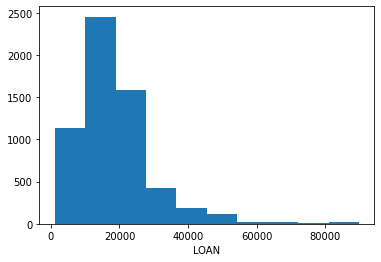

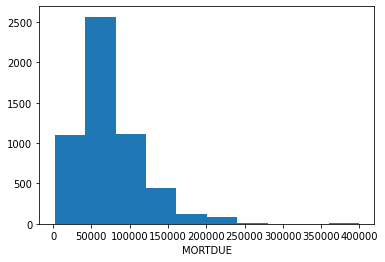

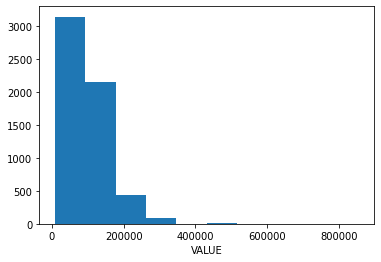

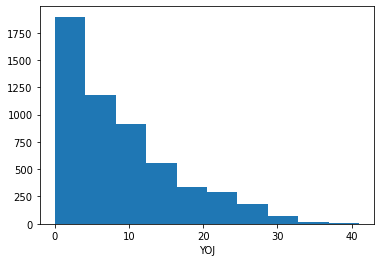

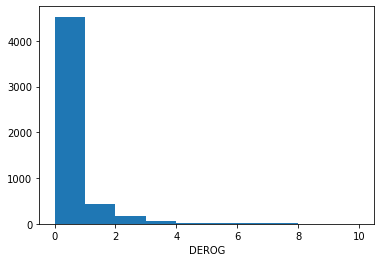

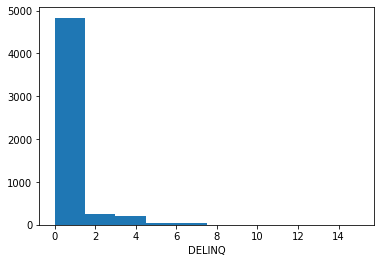

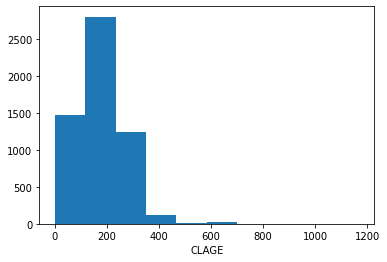

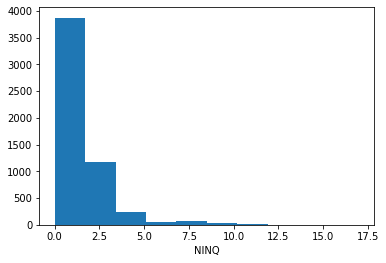

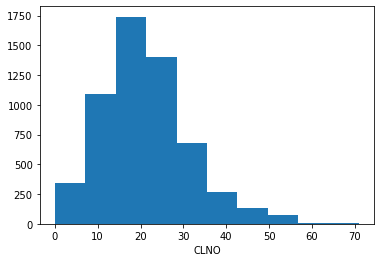

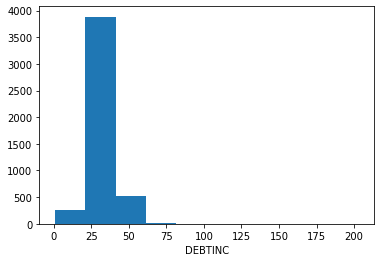

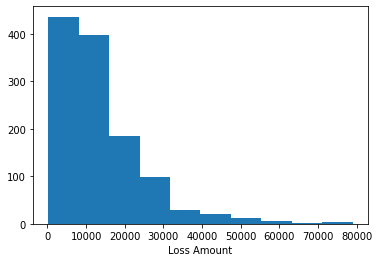

In [ ]:
for i in intList:
  plt.hist(df[i])
  plt.xlabel(i)
  plt.show()

for i in floatList:
  plt.hist(df[i])
  plt.xlabel(i)
  plt.show()

plt.hist(df[TARGET_LOSS])
plt.xlabel("Loss Amount")
plt.show()

In [ ]:
for i in objList :
    print(" Class = ", i )
    print( df[i].unique() )

 Class =  REASON
['HomeImp' nan 'DebtCon']
 Class =  JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']


In [ ]:
for i in objList :
    print( i )
    print( df[i].unique() )
    g = df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", df[i].mode()[0] )   
    print( "MISSING = ", df[i].isna().sum() )
    print( "\n\n")

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252



JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr        767 
Office     948 
Other      2388
ProfExe    1276
Sales      109 
Self       193 
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279





In [ ]:
for i in objList :
    if df[i].isna().sum() == 0 : continue
    print( i ) 
    print("HAS MISSING")
    NAME = "IMP_"+i
    print( NAME ) 
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    print( "variable",i," has this many missing", df[i].isna().sum() )
    print( "variable",NAME," has this many missing", df[NAME].isna().sum() )
    g = df.groupby( NAME )
    print( g[NAME].count() )
    print( "\n\n")
    df = df.drop( i, axis=1 )

REASON
HAS MISSING
IMP_REASON
variable REASON  has this many missing 252
variable IMP_REASON  has this many missing 0
IMP_REASON
DebtCon    3928
HomeImp    1780
MISSING    252 
Name: IMP_REASON, dtype: int64



JOB
HAS MISSING
IMP_JOB
variable JOB  has this many missing 279
variable IMP_JOB  has this many missing 0
IMP_JOB
MISSING    279 
Mgr        767 
Office     948 
Other      2388
ProfExe    1276
Sales      109 
Self       193 
Name: IMP_JOB, dtype: int64





In [ ]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860,70053,13500,NaN,97800
VALUE,39025,68400,16700,NaN,112000
YOJ,10.5,7,4,NaN,3
DEROG,0,0,0,NaN,0
DELINQ,0,2,0,NaN,0
CLAGE,94.3667,121.833,149.467,NaN,93.3333
NINQ,1,0,1,NaN,0


REASON and JOB are dropped.

In [ ]:
dt = df.dtypes
objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_FLAG, TARGET_LOSS ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

In [ ]:
print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- \n\n")


print(" NUMBER ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")

 OBJECTS 
 ------- 
IMP_REASON
IMP_JOB
 ------- 


 NUMBER 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC
 ------- 


Encode the objects IMP_REASON and IMP_JOB. 

In [ ]:
for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )  #drop_first=True uses one less class so for CAR_USE you either use PRIVATE or it assumes you use it COMMERCIAL 
    df = pd.concat( [df, y], axis=1 )
    df = df.drop( i, axis=1 )

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.0,1.000000,1.000000,1.0
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.0,NaN,335.000000,1841.0,373.000000,1217.000000,1523.0
LOAN,1100.000000,1300.000000,1500.000000,1500.0,1700.000000,1700.000000,1800.0,1800.000000,2000.000000,2000.0
MORTDUE,25860.000000,70053.000000,13500.000000,NaN,97800.000000,30548.000000,48649.0,28502.000000,32700.000000,NaN
VALUE,39025.000000,68400.000000,16700.000000,NaN,112000.000000,40320.000000,57037.0,43034.000000,46740.000000,62250.0
YOJ,10.500000,7.000000,4.000000,NaN,3.000000,9.000000,5.0,11.000000,3.000000,16.0
DEROG,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,3.0,0.000000,0.000000,0.0
DELINQ,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,2.0,0.000000,2.000000,0.0
CLAGE,94.366667,121.833333,149.466667,NaN,93.333333,101.466002,77.1,88.766030,216.933333,115.8
NINQ,1.000000,0.000000,1.000000,NaN,0.000000,1.000000,1.0,0.000000,1.000000,0.0


Replace missing values in numerical variables to median value. 

In [ ]:
missing_numList = []
for i in numList :
    if df[i].isna().sum() == 0 : continue
    print(f"{i} HAS MISSING")
    missing_numList.append(i)

print(missing_numList)

MORTDUE HAS MISSING
VALUE HAS MISSING
YOJ HAS MISSING
DEROG HAS MISSING
DELINQ HAS MISSING
CLAGE HAS MISSING
NINQ HAS MISSING
CLNO HAS MISSING
DEBTINC HAS MISSING
['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [ ]:
for i in numList :
    if df[i].isna().sum() == 0 : continue #if no values are missing then continue
    FLAG = "M_" + i #notes that there was a missing value here -- highly predictive to know it was missing 
    IMP = "IMP_" + i
    print("\n-------")
    print(i)
    #print( df[i].isna().sum() ) #print how many missing values there are
    print( FLAG )
    print( IMP )
    print(" -------\n")
    df[ FLAG ] = df[i].isna() + 0 #add zero and Python will know that if TRUE it's a 1 and FALSE it's a 0
    df[ IMP ] = df[ i ] #create an exact copy of the column
    df.loc[ df[IMP].isna(), IMP ] = df[i].median() #fill missing with the median of the variable
    print(df.head().T)
    df = df.drop( i, axis=1 )


-------
MORTDUE
M_MORTDUE
IMP_MORTDUE
 -------

                                 0             1             2        3  \
TARGET_BAD_FLAG       1.000000      1.000000      1.000000      1.0       
TARGET_LOSS_AMT       641.000000    1109.000000   767.000000    1425.0    
LOAN                  1100.000000   1300.000000   1500.000000   1500.0    
MORTDUE               25860.000000  70053.000000  13500.000000 NaN        
VALUE                 39025.000000  68400.000000  16700.000000 NaN        
YOJ                   10.500000     7.000000      4.000000     NaN        
DEROG                 0.000000      0.000000      0.000000     NaN        
DELINQ                0.000000      2.000000      0.000000     NaN        
CLAGE                 94.366667     121.833333    149.466667   NaN        
NINQ                  1.000000      0.000000      1.000000     NaN        
CLNO                  9.000000      14.000000     10.000000    NaN        
DEBTINC              NaN           NaN           Na

In [ ]:
dt = df.dtypes
objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_FLAG, TARGET_LOSS ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- \n\n")


print(" NUMBER ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")

 OBJECTS 
 ------- 
 ------- 


 NUMBER 
 ------- 
LOAN
M_MORTDUE
IMP_MORTDUE
M_VALUE
IMP_VALUE
M_YOJ
IMP_YOJ
M_DEROG
IMP_DEROG
M_DELINQ
IMP_DELINQ
M_CLAGE
IMP_CLAGE
M_NINQ
IMP_NINQ
M_CLNO
IMP_CLNO
M_DEBTINC
IMP_DEBTINC
 ------- 


In [ ]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_IMP_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_IMP_REASON_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_IMP_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000
z_IMP_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000


Similarly, fill missing values in TARGET_LOSS. Check if TARGET_FLAG has missing values too. 

In [ ]:
i = TARGET_LOSS
if df[i].isna().sum() != 0: #if no values are missing then continue
  FLAG = "M_" + i #notes that there was a missing value here -- highly predictive to know it was missing 
  IMP = "IMP_" + i
  print("\n-------")
  print(i)
  #print( df[i].isna().sum() ) #print how many missing values there are
  print( FLAG )
  print( IMP )
  print(" -------\n")
  df[ FLAG ] = df[i].isna() + 0 #add zero and Python will know that if TRUE it's a 1 and FALSE it's a 0
  df[ IMP ] = df[ i ] #create an exact copy of the column
  df.loc[ df[IMP].isna(), IMP ] = df[i].median() #fill missing with the median of the variable
  print(df.head().T)
  df = df.drop( i, axis=1 )


-------
TARGET_LOSS_AMT
M_TARGET_LOSS_AMT
IMP_TARGET_LOSS_AMT
 -------

                                 0             1             2             3  \
TARGET_BAD_FLAG       1.000000      1.000000      1.000000      1.000000       
TARGET_LOSS_AMT       641.000000    1109.000000   767.000000    1425.000000    
LOAN                  1100.000000   1300.000000   1500.000000   1500.000000    
z_IMP_REASON_HomeImp  1.000000      1.000000      1.000000      0.000000       
z_IMP_REASON_MISSING  0.000000      0.000000      0.000000      1.000000       
z_IMP_JOB_Mgr         0.000000      0.000000      0.000000      0.000000       
z_IMP_JOB_Office      0.000000      0.000000      0.000000      0.000000       
z_IMP_JOB_Other       1.000000      1.000000      1.000000      0.000000       
z_IMP_JOB_ProfExe     0.000000      0.000000      0.000000      0.000000       
z_IMP_JOB_Sales       0.000000      0.000000      0.000000      0.000000       
z_IMP_JOB_Self        0.000000      0.000000   